<a href="https://colab.research.google.com/github/CatDawn29/Catherine-Project/blob/main/Catherine's_Project_with_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Catherine's Project**

- Catherine Tippins

##**Loading Data**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import matplotlib.ticker as ticker
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn import set_config
from sklearn.preprocessing import StandardScaler
import matplotlib as mpl
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
set_config(display='diagram')

In [2]:
import pandas as pd
file_url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vTD4EZkLl5Fxj3IqoDfQyhCn3Qw3EAx0NWXTz6fK82fXXotHqMnp946t62C0k7fyMCbyv0co0KsYlQH/pub?gid=1317515577&single=true&output=csv'

In [3]:
sales = pd.read_csv(file_url)
sales

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [4]:
sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
sales2 = sales.copy()

In [6]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


##**Data Cleaning**

In [7]:
sales.shape

(8523, 12)

In [8]:
sales.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [9]:
sales.duplicated().sum()

0

In [10]:
sales.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [11]:
sales.isna().sum() / len(sales) * 100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [12]:
sales.describe().round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.00,8523.00,8523.00,8523.00,8523.00
mean,12.86,0.07,140.99,1997.83,2181.29
std,4.64,0.05,62.28,8.37,1706.50
min,4.56,0.00,31.29,1985.00,33.29
25%,8.77,0.03,93.83,1987.00,834.25
50%,12.60,0.05,143.01,1999.00,1794.33
75%,16.85,0.09,185.64,2004.00,3101.30
max,21.35,0.33,266.89,2009.00,13086.96


In [13]:
sales['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [14]:
sales['Item_Weight'].fillna(value =  sales['Item_Weight'].mean(),inplace = True)
sales['Outlet_Size'].fillna(value = 'Missing', inplace = True)

In [15]:
sales.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [16]:
sales['Item_Fat_Content'].replace(['LF', 'low fat'], 'Low Fat', inplace=True)
sales['Item_Fat_Content'].replace(['reg'], 'Regular', inplace=True)

In [17]:
sales['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

##**Exploratory Visuals**

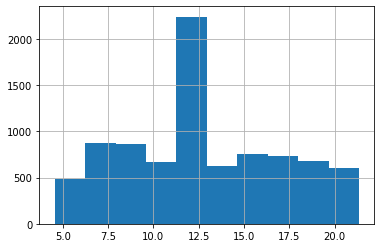

In [18]:
sales['Item_Weight'].hist();

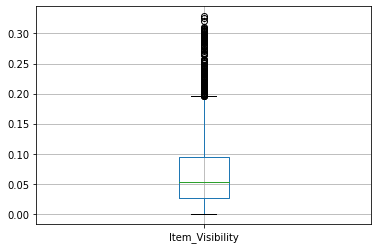

In [19]:
sales.boxplot(column = 'Item_Visibility');

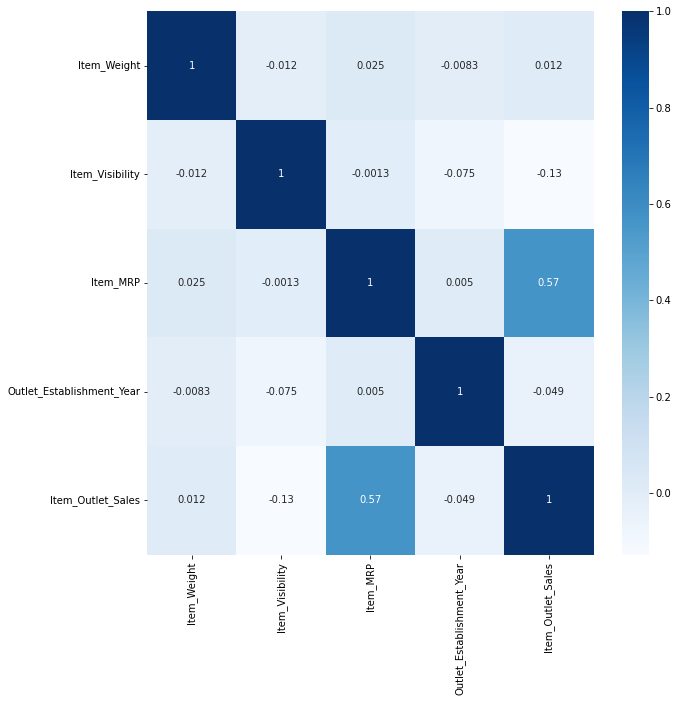

In [20]:
corr = sales.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, cmap='Blues', annot=True);

##**Explantory Visuals**

In [21]:
Item_sales = sales['Item_Fat_Content'].value_counts()

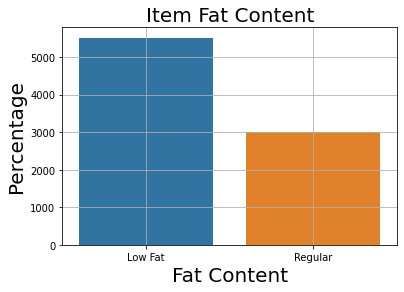

In [22]:
ax = sns.countplot(data = sales, x = 'Item_Fat_Content');
ax.set_title('Item Fat Content', fontsize=20)
ax.set_ylabel('Percentage', fontsize=20)
ax.set_xlabel("Fat Content", fontsize=20)
ax.grid()

In this graph, I wanted to keep it simple and show that there is more items in the store that have low fat content instead of regular.

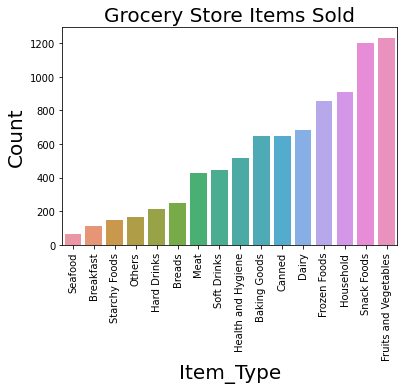

In [23]:
ax = sns.countplot(data = sales, x = 'Item_Type', order = sales['Item_Type'].value_counts(ascending = True).index)
plt.xticks(rotation=90);
ax.set_title('Grocery Store Items Sold', fontsize=20);
ax.set_ylabel('Count', fontsize=20);
ax.set_xlabel('Item_Type', fontsize=20);

In this graph, I wanted to show what item type sold the least vs the item type the sold the most. 

Overall, this data shows that healthier options sell more in this grocery store. 

In [24]:
file_url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vTD4EZkLl5Fxj3IqoDfQyhCn3Qw3EAx0NWXTz6fK82fXXotHqMnp946t62C0k7fyMCbyv0co0KsYlQH/pu'

In [25]:
sales = pd.read_csv('/content/sales_predictions - sales_predictions.csv')
sales

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [26]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [27]:
X = sales.drop('Item_Outlet_Sales', axis=1)
y = sales['Item_Outlet_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [28]:
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

In [29]:
freq_imputer = SimpleImputer(strategy='most_frequent')
mean_imputer = SimpleImputer(strategy='mean')

scaler = StandardScaler()

ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [30]:
numeric_pipe = make_pipeline(mean_imputer, scaler)
numeric_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [31]:
categorical_pipe = make_pipeline(freq_imputer, ohe)
categorical_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [32]:
number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)

preprocessor = make_column_transformer(number_tuple, category_tuple)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f17d5aabe50>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f17d5ba83a0>)])

In [33]:
preprocessor.fit(X_train);

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [34]:
X_train_processed = preprocessor.transform(X_train)
X_test_processed= preprocessor.transform(X_test)

In [35]:
print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_processed).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)
print('\n')
print('shape of data is', X_train.shape)
print('\n')
X_train

0 missing values in training data
0 missing values in testing data


All data in X_train_processed are float64
All data in X_test_processed are float64


shape of data is (6392, 11)




,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
4776,NCG06,16.350,Low Fat,0.029565,Household,256.4646,OUT018,2009,Medium,Tier 3,Supermarket Type2
7510,FDV57,15.250,Regular,0.000000,Snack Foods,179.7660,OUT018,2009,Medium,Tier 3,Supermarket Type2
5828,FDM27,12.350,Regular,0.158716,Meat,157.2946,OUT049,1999,Medium,Tier 1,Supermarket Type1
5327,FDG24,7.975,Low Fat,0.014628,Baking Goods,82.3250,OUT035,2004,Small,Tier 2,Supermarket Type1
4810,FDD05,19.350,Low Fat,0.016645,Frozen Foods,120.9098,OUT045,2002,NaN,Tier 2,Supermarket Type1
...,...,...,...,...,...,...,...,...,...,...,...
5734,FDY08,9.395,Regular,0.286345,Fruits and Vegetables,139.1838,OUT010,1998,NaN,Tier 3,Grocery Store
5191,FDC41,15.600,Low Fat,0.117575,Frozen Foods,75.6670,OUT017,2007,NaN,Tier 2,Supermarket Type1
5390,NCQ53,17.600,Low Fat,0.018944,Health and Hygiene,237.3590,OUT045,2002,NaN,Tier 2,Supermarket Type1
860,FDL46,20.350,low fat,0.054363,Snack Foods,117.9466,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [37]:
scaler = StandardScaler()
reg = LinearRegression()
set_config(display='diagram')
reg_pipe = make_pipeline(scaler, reg)

In [38]:
reg_pipe.fit(X_train_processed, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [39]:
predictions = reg_pipe.predict(X_test_processed)
     

In [40]:
prediction_df = X_test.copy()
prediction_df['True Median Price'] = y_test
prediction_df['Predicted Median Price'] = predictions
prediction_df['Error'] = predictions - y_test
prediction_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,True Median Price,Predicted Median Price,Error
4931,NCS53,14.500,Low Fat,0.089960,Health and Hygiene,159.5604,OUT045,2002,NaN,Tier 2,Supermarket Type1,1426.1436,1426.951535,0.807935
4148,FDF58,NaN,Low Fat,0.009535,Snack Foods,64.5510,OUT027,1985,Medium,Tier 3,Supermarket Type3,1201.7690,2632.951535,1431.182535
7423,NCM29,11.500,Low Fat,0.017742,Health and Hygiene,129.6626,OUT017,2007,NaN,Tier 2,Supermarket Type1,1836.2764,2290.951535,454.675135
4836,FDM40,10.195,Low Fat,0.000000,Frozen Foods,143.1154,OUT017,2007,NaN,Tier 2,Supermarket Type1,2410.8618,822.951535,-1587.910265
944,FDH10,21.000,Low Fat,0.049264,Snack Foods,195.0478,OUT013,1987,High,Tier 3,Supermarket Type1,1549.9824,4648.951535,3098.969135


  The Outlet_Location of Tier 2 did the best due to the fact that it had the smallest error out of all of them because its predicted median price was not that far off its true median price. 

In [41]:
sales.duplicated().sum()

0

In [42]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [43]:
sales.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [44]:
rf = RandomForestRegressor(random_state = 42)

In [45]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [ ]:
rf.fit(X_train_processed, y_train)

In [ ]:
rf.predict(X_test_processed)

In [ ]:
rf_train_score = rf.score(X_train_processed, y_train)
rf_test_score = rf.score(X_test_processed, y_test)
print(rf_train_score)
print(rf_test_score)

In [ ]:
rf_9 = RandomForestRegressor(max_depth = 9, random_state = 42)
rf_9.fit(X_train_processed, y_train)
rf_9_train_score = rf_9.score(X_train_processed, y_train)
rf_9_test_score = rf_9.score(X_test_processed, y_test)
print(rf_9_train_score)
print(rf_9_test_score)

In [ ]:
est_depths = [estimator.get_depth() for estimator in rf.estimators_]
max(est_depths)

In [ ]:
depths = range(1, max(est_depths))
scores = pd.DataFrame(index=depths, columns=['Test Score'])
for depth in depths:    
   model = RandomForestRegressor(max_depth=depth)
   model.fit(X_train_processed, y_train)
   scores.loc[depth, 'Train Score'] = model.score(X_train_processed, y_train)
   scores.loc[depth, 'Test Score'] = model.score(X_test_processed, y_test)
   scores.head()

In [ ]:
plt.plot(scores['Test Score']);

In [ ]:
sorted_scores = scores.sort_values(by='Test Score', ascending=False)
sorted_scores.head()

In [ ]:
n_ests = [50, 100, 150, 200, 250]
scores2 = pd.DataFrame(index=n_ests, columns=['Test Score', 'Train Score'])
for n in n_ests:
   model = RandomForestRegressor(max_depth=29, n_estimators=n)
   model.fit(X_train_processed, y_train)
   scores2.loc[n, 'Train Score'] = model.score(X_train_processed, y_train)
   scores2.loc[n, 'Test Score'] = model.score(X_test_processed, y_test)
scores2.head()

In [ ]:
plt.plot(scores2['Test Score'])
plt.xticks(n_ests);

In [ ]:
sorted_scores2 = scores2.sort_values(by='Test Score', ascending=False)
sorted_scores2.head()

In [ ]:
scaler = StandardScaler()
lin_reg = LinearRegression()
lin_reg_pipe = make_pipeline(scaler, lin_reg)
lin_reg_pipe.fit(X_train_processed, y_train)

In [ ]:
train_pred = lin_reg_pipe.predict(X_train_processed)
test_pred = lin_reg_pipe.predict(X_test_processed)

In [ ]:
train_RMSE = np.sqrt(np.mean(np.abs(train_pred- y_train)**2))
test_RMSE = np.sqrt(np.mean(np.abs(test_pred - y_test)**2))
print(f'Model Training RMSE: {train_RMSE}')
print(f'Model Testing RMSE: {test_RMSE}')

In [ ]:
train_r2 = np.corrcoef(y_train, train_pred)[0][1]**2
test_r2 = np.corrcoef(y_test, test_pred)[0][1]**2
print(f'Model Training R2: {train_r2}')
print(f'Model Testing R2: {test_r2}')

In [ ]:
train_r2 = np.corrcoef(y_train, train_pred)[0][1]**2
test_r2 = np.corrcoef(y_test, test_pred)[0][1]**2
print(f'Model Training R2: {train_r2}')
print(f'Model Testing R2: {test_r2}')

I would recommend the Linear Regression Model because there is less error there due to the fact that the actual predicted prices are closer to the True Median Price. 